<a href="https://colab.research.google.com/github/ad-astra-per-ardua/DataAnalysis/blob/main/Classification_Task_2305304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [18]:
iris = datasets.load_iris()
X = iris['data'][:, 2:]
y = iris['target']

In [19]:
print(f"Feature Names: {iris['feature_names'][2:]}")
print(f"Target Names: {iris['target_names']}")

Feature Names: ['petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(f"KNN Test Accuracy: {accuracy:.2f}")

KNN Test Accuracy: 1.00


<ipython-input-22-5b84b83935bc>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1],


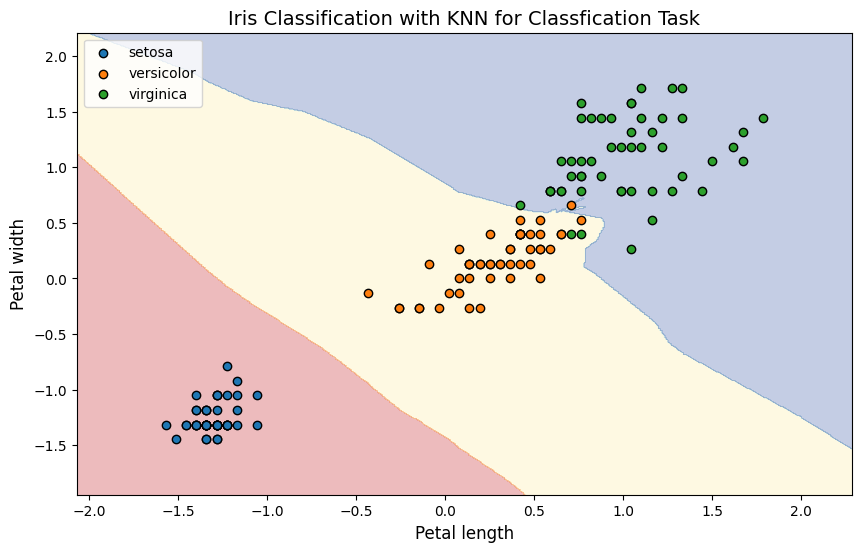

In [22]:
# Generate meshgrid for visualization
x0, x1 = np.meshgrid(
    np.linspace(X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5, 500),
    np.linspace(X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5, 500)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = knn.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.RdYlBu)
for i, target_name in enumerate(iris['target_names']):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1],
                label=target_name, cmap=plt.cm.RdYlBu, edgecolor='k')

plt.legend(loc="upper left")
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.title("Iris Classification with KNN for Classfication Task", fontsize=14)
plt.show()


In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [33]:
wine = load_wine()
X = wine['data']
y = wine['target']

print(f"Feature Names: {wine['feature_names']}")
print(f"Target Names: {wine['target_names']}")
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")
print(f"Class Distribution: {np.bincount(y)}")

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']
Shape of X: (178, 13), Shape of y: (178,)
Class Distribution: [59 71 48]


In [34]:
# Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print(f"KNN Test Accuracy: {accuracy:.2f}")

# Print Classification Confusion Matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine['target_names']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Test Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      0.93      0.96        14
     class_2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Confusion Matrix:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]


In [36]:
# Data Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [37]:
# KNN train after convert PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [38]:
# Generate 2D meshgrid
x0, x1 = np.meshgrid(
    np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 500),
    np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 500)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred_pca = knn_pca.predict(X_new).reshape(x0.shape)

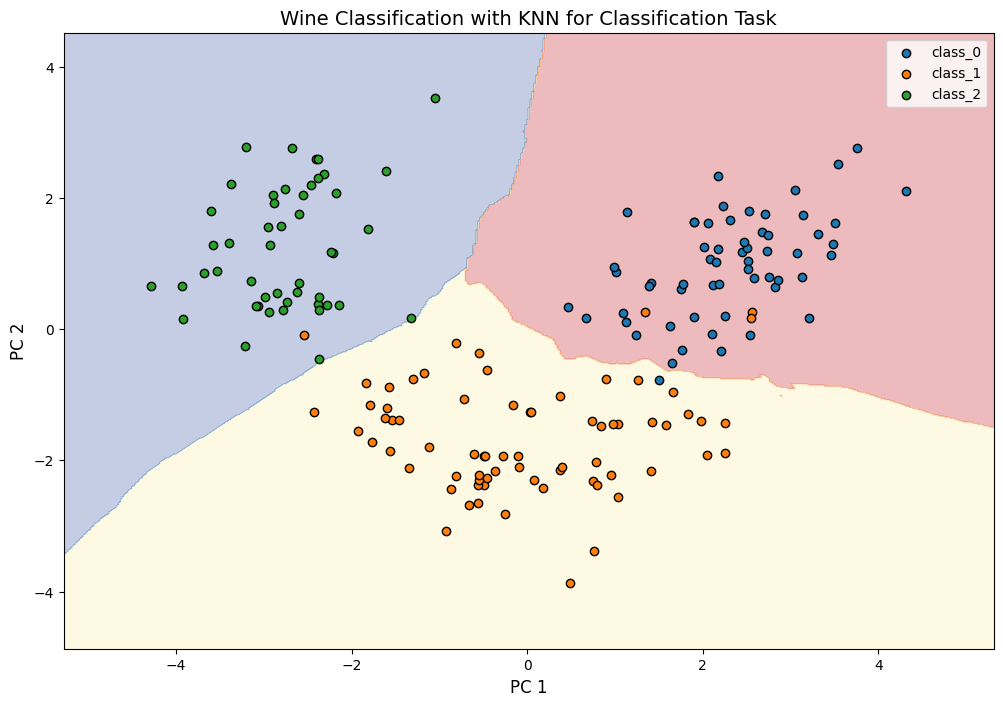

In [39]:
# Visualization
plt.figure(figsize=(12, 8))
plt.contourf(x0, x1, y_pred_pca, alpha=0.3, cmap=plt.cm.RdYlBu)
for i, target_name in enumerate(wine['target_names']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, edgecolor='k')
plt.legend()
plt.title("Wine Classification with KNN for Classification Task", fontsize=14)
plt.xlabel("PC 1", fontsize=12)
plt.ylabel("PC 2", fontsize=12)
plt.show()